# Regularized Logistic Regression

Predict whether microchips from a fabrication plant passes quality assurance (QA).


1. [Load Data](#data)
3. [Visualize Data](#plot)
2. [Add Polynomial Features](#polynomial)
5. [Initialization of Parameters](#initial)
7. [Cost Function](#cost)
8. [Gradient Descent](#gradient)
9. [Make Predictions](#predict)
10. [Merge All Functions](#merge)

## Load Data <a name="data"></a>

In [1]:
%pylab inline
import pylab
dat = np.loadtxt('datasets/ex2data2.txt', delimiter = ',')

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = dat[:, :2]
y = dat[:, [2]]
print("Number of examples: {}".format(len(y)))
print("Number of features: {}".format(X.shape[1]))

Number of examples: 118
Number of features: 2


## Visualize Data <a name="plot"></a>

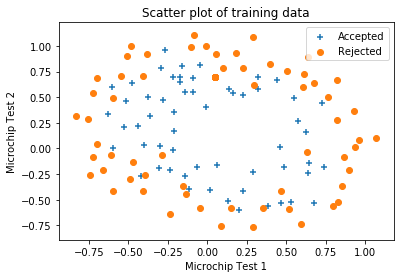

In [3]:
pos = np.where(y == 1)
neg = np.where(y == 0)
p = plt.scatter(X[pos,0], X[pos,1], marker = '+')
n = plt.scatter(X[neg,0], X[neg,1], marker = 'o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Scatter plot of training data')
plt.legend((p, n), ('Accepted', 'Rejected'), loc = 'upper right')
plt.show()

## Add Polynomial Features <a name="polynomial"></a>

$$
mapFeature(x)=
\begin{pmatrix}
1\newline
x_1\newline
x_2\newline
x_1^2\newline
x_1 x_2\newline
x_2^2\newline
\vdots\newline
x_1 x_2^5\newline
x_2^6
\end{pmatrix}
$$

In [4]:
def mapFeature(X1, X2, degree = 6):
    N = X1.shape[0]
    out = ones((N, 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            new = np.power(X1, i - j) * np.power(X2, j)
            new = np.reshape(new, (N, 1))
            out = np.hstack((out, new))
    return out

## Initialization of Parameters<a name="initial"></a>

In [5]:
def initialwzeros(dim):
    return np.zeros((dim, 1))

## Cost Function<a name="cost"></a>

$$
J(\theta)=-\frac{1}{N}\sum_{i=1}^N\left[y^{(i)}\log h(x^{(i)}) + (1-y^{(i)})\log\left (1-h(x^{(i)})\right)\right] +
\frac{\lambda}{2N}\sum_{j=1}^p \theta_j^2
$$

## Gradient Descent<a name="gradient"></a>

$$
\theta_0 \leftarrow \theta_j -\alpha\frac{1}{N}\sum _{i=1}^N  \left(h(x^{(i)})  - y^{(i)}\right)
$$

$$
\theta_j \leftarrow \theta_j -\frac{\alpha}{N}\left[\sum _{i=1}^N  \left(h(x^{(i)})  - y^{(i)}\right)x^{(i)}_j+\lambda\theta_j\right],\ \ \ \ j=1,...,p
$$

--------

$$
\frac{\partial J(\theta)}{\partial \theta_j}=\begin{cases}
\frac{1}{N}\sum _{i=1}^N  \left(h(x^{(i)})  - y^{(i)}\right), &j=0\\
\frac{1}{N}\left[\sum _{i=1}^N  \left(h(x^{(i)})  - y^{(i)}\right)x^{(i)}_j+\lambda\theta_j\right],&j=1,...,p
\end{cases}
$$

In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [7]:
def costAndGradient(X, y, theta, lam):
    # sample size
    N = len(y)
    
    temp = np.copy(theta)
    temp[0] = 0
    
    # compute cost
    a = sigmoid(np.dot(X, theta))
    cost = - np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))
    cost += lam * np.dot(temp.T, temp)/(2 * N)
     
    # compute gradient
    grad = (np.dot(X.T, a - y) + lam * temp)/N

    d = {"cost":cost,
         "grad":grad}
    return d

In [8]:
def optimize(X, y, theta, lam, learning_rate, iterations):
    J = []
    for i in range(iterations):
        d = costAndGradient(X, y, theta, lam)
        theta -= learning_rate * d["grad"]
        J.append(d["cost"])
    return theta, J

## Make Predictions <a name="predict"></a>

In [9]:
def predict(X, theta):
    X_poly = mapFeature(X[:, 0], X[:, 1])
    p = sigmoid(np.dot(X_poly, theta))
    return (p > 0.5)

## Merge all Function <a name="merge"></a>

In [10]:
def model(X, y, lam = 1, iterations = 100, learning_rate = 5):
    # add polynomials
    X_poly = mapFeature(X[:, 0], X[:, 1])
    
    # initializing params
    theta = initialwzeros(X_poly.shape[1])
    
    # optimization with gradient descent
    [theta, cost_hist] = optimize(X_poly, y, theta, lam, learning_rate, iterations)
    
    d = {"costs": cost_hist,
         "theta": theta,
         "lambda": lam,
         "learning_rate": learning_rate,
         "iterations": iterations}
    return d

In [11]:
d = model(X, y)

In [12]:
d["costs"][-1]

array([[0.52900313]])

In [13]:
theta_last = d["theta"]

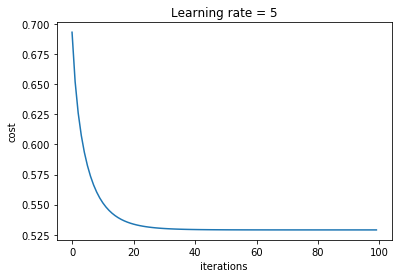

In [14]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

### Accuracy on the Training Set

In [15]:
np.mean(y == predict(X, theta_last))

0.8305084745762712

### Plot Decision Boundary

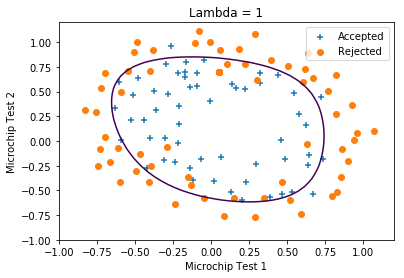

In [16]:
u = np.linspace(-1, 1.2, 50); uu = np.reshape(u, (50, 1))
v = np.linspace(-1, 1.2, 50); vv = np.reshape(v, (50, 1))
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(mapFeature(uu[i,:], vv[j,:]), theta_last)
z = z.T
plt.contour(u, v, z, 0)

pos = np.where(y == 1)
neg = np.where(y == 0)
p = plt.scatter(X[pos,0], X[pos,1], marker = '+')
n = plt.scatter(X[neg,0], X[neg,1], marker = 'o')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title("Lambda = " + str(d["lambda"]))
plt.legend((p, n), ('Accepted', 'Rejected'), loc = 'upper right')
plt.show()